In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import urllib.request
import os
from astroML.correlation import bootstrap_two_point_angular

# for downloading 
def download(PATH,local_name,format_offile):
    '''This function takes PATH which is url of file and local_name i.e the name of file after downloaded and format
    file and downloads the file from web and stores in your path'''
    local_path=os.path.join("./",f'{local_name}.{format_offile}')
    urllib.request.urlretrieve(PATH,local_path)

<p>Calculate the angular two-point correlation function of galaxies (including errors obtained by 10 bootstrap resamples) using subset of data from the Blanco Cosmology Survey with r-band magnitude between 17 and 20, and using 16 logarithmic-spaced angular bins from 1/60◦ to 1◦. Use a linear scale for Y-axis. Galaxies in Blanco Cosmology Survey have spread model > 0.002. This data can be downloaded from http://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt.</p>

In [2]:
# downloading the dataset for this question
download("http://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt","BCS05hr_reduced","txt")

In [3]:
data = np.array([i.strip().split() for i in open("BCS05hr_reduced.txt").readlines()]) #Reading .dat file in python
data = data[1:]
data=[i.astype(float) for i in data]

mini_r_mag=17 # minimum r-band magnitude
maxi_r_mag=20 # maximum r-band magnitude
mini_spread_model=0.002

datContent=[] #  storing subset of data which has magnitude of R band between 17 and 20 and spread_model>0.002
for dat in data:
    if(dat[2]>=mini_r_mag and dat[2]<=maxi_r_mag and dat[3]>mini_spread_model):
        datContent.append(dat)
        
# the below are individual fields of the data satisfying condition that R_magnitude in [17,20]

RA=np.array(datContent)[:,0]
DEC=np.array(datContent)[:,1]
R_mag=np.array(datContent)[:,2]
spread_model=np.array(datContent)[:,3]
spread_model_err=np.array(datContent)[:,4]
# storing RA,DEC,R_mag,spread_model and spread_model_err values

In [4]:
bins = np.logspace(np.log10(1/60), 0, 17) # logarithemic spaced angular bins from 1/60 to 1 degree with base of 10

In [5]:
Nbootstraps=10 # number of bootstrap resamples
method='landy-szalay' # I am using same method as that is in AstroML
np.random.seed(10) 

results = bootstrap_two_point_angular(RA,DEC,bins=bins,method=method,Nbootstraps=Nbootstraps)
# results have three arrays first is correlation and second is error in correlation and third all bootstrap samples

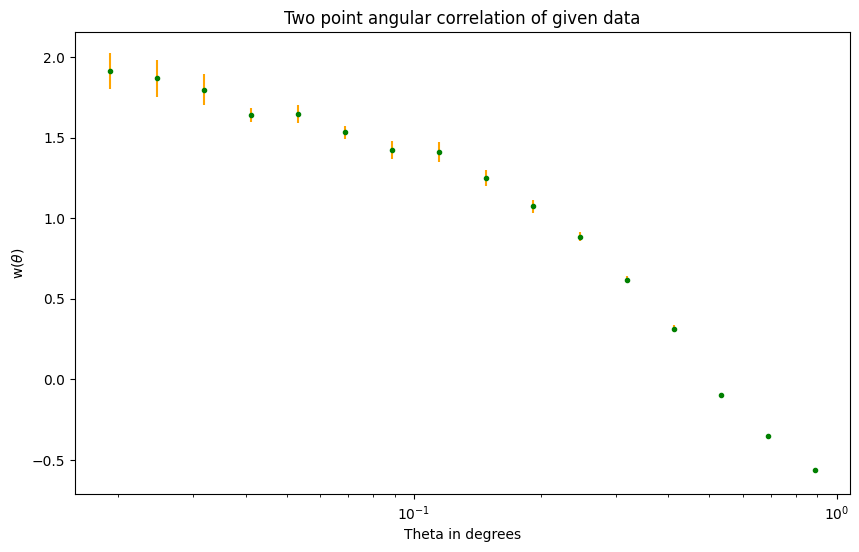

In [6]:
bin_centers=0.5*(bins[1:]+bins[:-1])
plt.figure(figsize=(10,6))
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Theta in degrees')
plt.ylabel(r'w($\theta$)')
plt.errorbar(bin_centers,results[0],results[1],fmt='.g',ecolor='orange')
plt.title("Two point angular correlation of given data")
plt.show()